# Moments of Discrete Distributions

In the previous section we discussed the concepts of PMF and CDF. In this section we will introduce a couple of summaries of these functions, called moments.

## Expected Value

In the example of the two coin tosses, we met the idea of a random variable: a function that maps the outcomes of a random experiment to real numbers. The concrete example was a payoff of 2 EUR for each head. Its PMF was:

| x      | 0   | 2   | 4   |
| ------ | --- | --- | --- |
| P(X=x) | 1/4 | 2/4 | 1/4 |

If you are to play this game, you could ask the question: "How much money can I expect to win on average?" if I play this game many times. 

The answer to this question is given by the expected value of the random variable. The expected value is a weighted average of the possible values of the random variable, where the weights are given by the probabilities of the values.

:::{#def-expected-value}
## Expected Value

The expected value of a discrete random variable X is defined as:

$$
E(X) = \sum_{x} x \cdot P(X=x)
$$

where the sum is over all possible values of X.
:::

:::{#exr-expected-value-coin-toss}
## Expected Value of the Payoff of Two Coin Tosses

Calculate the expected value of the payoff of two coin tosses.

$$
E(X) = 0 \cdot P(X=0) + 2 \cdot P(X=2) + 4 \cdot P(X=4) = 0 \cdot 1/4 + 2 \cdot 2/4 + 4 \cdot 1/4 = 2
$$

:::


In [1]:
# Simulate the coin toss game and calculate the average

import numpy as np

payoff_single = np.random.choice([0, 2, 4], size=1000, p=[0.25, 0.5, 0.25])
np.mean(payoff_single)

1.968

In [2]:
payoffs = np.random.choice([0, 2, 4], size=(1000, 1000), p=[0.25, 0.5, 0.25])
payoffs_average = np.mean(payoffs, axis=1)

Text(4.8166666666666655, 0.5, 'Frequency')

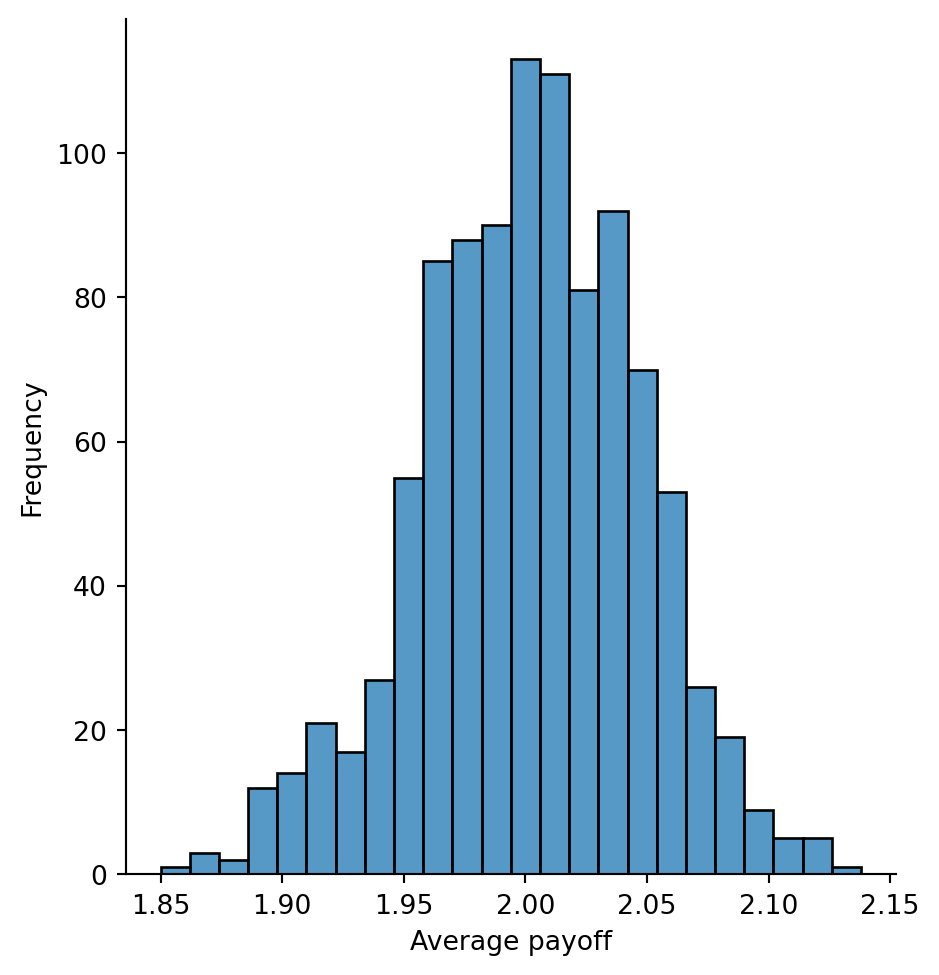

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(payoffs_average)
plt.xlabel('Average payoff')
plt.ylabel('Frequency')

The expectation has a couple of nice properties and we will need them in the following sections.

:::{#thm-expected-value}
## Properties of Expected Value

1. The expected value of a constant is the constant itself:

$$
E(a) = a
$$

2. The expected value of a sum of random variables is the sum of the expected values:

$$
E(X + Y) = E(X) + E(Y)
$$

3. The expected value of a scaled random variable is the scaled expected value:

$$
E(aX) = a \cdot E(X)
$$

:::

:::{.callout-note collapse="true"}

Let us prove the third property. We have:

$$
E(aX) = \sum_{x} a \cdot x \cdot P(X=x) = a \cdot \sum_{x} x \cdot P(X=x) = a \cdot E(X)
$$

This follows from the fact that $a$ does not depend on the summation index $x$.

:::


## The Bernoulli Distribution

The Bernoulli distribution is a simple distribution that models the outcome of a single trial with two possible outcomes: success and failure. Let success be denoted by 1 and failure by 0. The PMF of the Bernoulli distribution is:

$$
\begin{align*}
P(X=1) & = p \\
P(X=0) & = 1-p
\end{align*}
$$

where $p$ is the probability of success.

The expected value of a Bernoulli random variable is very simple to calculate:

$$
E(X) = 1 \cdot p + 0 \cdot (1-p) = p
$$



## The Binomial Distribution

We have introduced the binomial distribution in the previous section. The PMF of the binomial distribution is given by:

$$
P(X=x) = \binom{n}{x} p^x (1-p)^{n-x}, \quad x=0,1,\ldots,n
$$

where $n$ is the number of trials, $x$ is the number of successes, and $p$ is the probability of success in a single trial.

:::{#exr-expected-value-binomial}
## Expected Value of the Binomial Distribution

There are two equivalent ways to calculate the expected value of the binomial distribution. One way is to use the definition of the expected value from @def-expected-value and compute the sum directly. The solution is provided below for reference. Another ways is to use the fact that a binomial random variable is a sum of $n$ independent Bernoulli random variables, each with expected value $p$.

A Bernoulli random variable is a random variable that takes the value 1 with probability $p$ and 0 with probability $1-p$. The expected value of a Bernoulli random variable is $p$.

$$
1 \cdot p + 0 \cdot (1-p) = p
$$

A binomially distributed random variable is a sum of $n$ independent Bernoulli random variables. Let $X_1, X_2, \ldots, X_n$ be independent Bernoulli random variables with success probability $p$. Then, the binomial random variable $X$ is defined as:

$$
X = X_1 + X_2 + \ldots + X_n
$$

The expected value of $X$ is (using the properties of the expected value from @thm-expected-value):

$$
E(X) = E(X_1 + X_2 + \ldots + X_n) = E(X_1) + E(X_2) + \ldots + E(X_n) = \underbrace{p + p + \ldots p}_{n \text{ times}} = n \cdot p
$$


:::

:::{.callout-note collapse="true"}
## (Optional) Solution Using the Binomial Formula (click to expand)

Calculate the expected value of the binomial distribution using the definition of the expected value from @def-expected-value.

$$
E(X) = \sum_{x=0}^{n} x \cdot P(X=x) = \sum_{x=0}^{n} x \binom{n}{x} p^x (1-p)^{n-x}
$$

This formula looks very complicated at first, but we can simplify it by using the following identity and the binomial theorem:

$$
x \binom{n}{x} = n \binom{n-1}{x-1}
$$

To see why this identity is true, consider the following the definition of the binomial coefficient:

$$
\binom{n}{x} = \frac{n!}{x!(n-x)!}
$$

Then, we have:

$$
x \binom{n}{x} = x \frac{n!}{x!(n-x)!} = n \frac{(n-1)!}{(x-1)!((n - \cancel{1})- (x - \cancel{1}))!} = n \binom{n-1}{x-1}
$$

The binomial theorem states that:

$$
(a + b)^m = \sum_{i=0}^{m} \binom{m}{i} a^{m-i} b^i
$$

Using the identity, we can factor out $np$ from the sum:

$$
\begin{align*}
E(X) & = \sum_{x=0}^{n} x \binom{n}{x} p^x (1-p)^{n-x} \\
& = \sum_{x=1}^{n} n \binom{n-1}{x-1} p^x (1-p)^{n-x} \\
& = n \sum_{x=1}^{n} \binom{n-1}{x-1} p^x (1-p)^{n-x} \\
& = np \sum_{x=1}^{n} \binom{n-1}{x-1} p^{x-1} (1-p)^{n - x} \\
\end{align*}
$$

Now, let's take a close look at the sum:

$$
\begin{align*}
\sum_{x=1}^{n} \binom{n-1}{x-1} p^{x-1} (1-p)^{n - x}
\end{align*}
$$

It may be hard to see at first, but this sum is actually equal to 1.

$$
\begin{align*}
\sum_{x=1}^{n} \binom{n-1}{x-1} p^{x-1} (1-p)^{n - x} & = \sum_{x=0}^{n-1} \binom{n-1}{x} p^{x} (1-p)^{n - 1 - x} \\
& = (p + (1-p))^{n-1} = 1
\end{align*}
$$


:::

In [4]:
# Binomial distribution with n=100, p=0.3, 1000 samples
# The expected value is n*p = 30

x = np.random.binomial(100, 0.3, size=1000)
np.mean(x)

29.901

## Variance

Until now we have discussed the expected value of a random variable which gives us an idea about the location of the distribution. Another important summary of a distribution is the variance which gives us an idea about the spread of the distribution (how different the values produced by the distribution are from the expected value).

:::{#def-variance}
## Variance and Standard Deviation

The variance of a random variable X is defined as:

$$
Var(X) = E((X - E(X))^2) = E(X^2) - E(X)^2
$$

The standard deviation is the square root of the variance:

$$
S(X) = \sqrt{Var(X)}
$$

:::

:::{#exr-variance-coin-toss}
## Variance of the Payoff of Two Coin Tosses

Calculate the variance and the standard deviation of the payoff of two coin tosses.

$$
Var(X) = \sum_{x} (x - E(X))^2 \cdot P(X=x) = \sum_{x} (x - 2)^2 \cdot P(X=x) = (0 - 2)^2 \cdot 1/4 + (2 - 2)^2 \cdot 2/4 + (4 - 2)^2 \cdot 1/4 = 2
$$

$$
S(X) = \sqrt{Var(X)} = \sqrt{2}
$$

:::



In [5]:
x = np.array([0, 2, 4])
p = np.array([0.25, 0.5, 0.25])

E_X = np.sum(x*p)
V_X = np.sum((x-E_X)**2*p)
V_X

2.0

The variance has a number of properties that make it a useful summary of a random variable:

:::{#thm-variance}
## Properties of Variance


1. The variance is a quadratic operator:

$$
Var(aX + b) = a^2 Var(X)
$$

where $a$ and $b$ are constants.

2. The variance of a constant is zero:

$$
Var(a) = 0, \quad c \in \mathbb{R}
$$

3. The variance of a sum of independent random variables is the sum of the variances:

$$
Var(X + Y) = Var(X) + Var(Y)
$$

4. The variance of a difference of independent random variables is the sum of the variances:

$$
Var(X - Y) = Var(X) + Var(Y)
$$
:::

:::{.callout-note collapse="true"}
## Proof 

Let us prove the first property. We have:

$$
\begin{align*}
Var(aX + b) & = E((aX + b - E(aX + b))^2) \\
& = E((aX + b - aE(X) - b)^2) \\
& = E((a(X - E(X)))^2) \\
& = E(a^2(X - E(X))^2) \\
& = a^2 E((X - E(X))^2) \\
& = a^2 Var(X)
\end{align*}
$$

The second property is easy to prove:

$$
Var(a) = E((a - E(a))^2) = E(0) = 0
$$

Intuitively, a constant does not vary, so its variance is zero.

We will leave the proofs of the third and fourth properties without a proof for now, because they involve the joint distribution of random variables. We will discuss this in the next section.

:::

:::{#exr-variance-binomial}
## Variance of the Binomial Distribution

Calculate the variance of the binomial distribution using the definition of the variance from @def-variance. The easiest way to do this is to use the fact that a binomial random variable is a sum of $n$ independent Bernoulli random variables, each with variance $p(1-p)$.

$$
Var(X) = n \cdot p \cdot (1-p)
$$


:::

In [6]:
# For a binomial distribution, the variance is n*p*(1-p)
# For n=100, p=0.3, the variance is 21

x = np.random.binomial(100, 0.3, size=1000)
np.var(x, ddof=1)


20.959358358358354